In [1]:
import numpy as np
import matplotlib.pyplot as plt
seed = 42
np.random.seed(seed=seed)
%matplotlib inline

In [2]:
def gen_param(num):
    path = list(range(num)) + [0]
    X, Y = np.random.random([2, num])
    XY = X + Y * 1j
    S = set(list(range(num)))
    return num, path, X, Y, XY, S

In [3]:
def plot_path(path, size=6):
    plt.figure(figsize=(size, size))
    cmap = plt.get_cmap("tab10")
    plt.axis('equal')
    plt.plot(X[path], Y[path], alpha=0.0)
    plt.scatter(X[0], Y[0], s=80, c='r', marker='o')
    
    for i in range(len(path)-1):
        plt.arrow(X[path[i]], Y[path[i]], 
                  X[path[i+1]]-X[path[i]], Y[path[i+1]]-Y[path[i]], 
                  head_width=0.02, head_length=0.02, length_includes_head=True, 
                  fc=cmap(0), ec=cmap(0))
    
    for i in range(num):
        plt.text(X[i], Y[i]+0.01, s=i, fontsize=10, color='gray')

In [4]:
def dist_mx(num):
    mx = []
    for i in range(num):
        mx.append([])
        for j in range(num):
            mx[i].append(abs(XY[i] - XY[j]))
    return mx

In [5]:
num, path, X, Y, XY, S = gen_param(4)

# dist=([0,20,4,16],[48,0,32,12],[100,60,0,92],[40,24,64,0])
# time=([4,2,4,1],[6,2,8,2],[10,6,3,5],[12,15,6,7])
# avg_dist_time=([0,26,14,27],[15,0,32,14],[10,16,0,9],[12,15,16,0])

dist=([0,1,999,999],[999,0,1,999],[999,999,0,1],[1,999,999,0])
time=([0,999,999,2],[2,0,999,999],[999,2,0,999],[999,999,2,0])
avg_dist_time=([0,3,999,999],[999,0,3,999],[999,999,0,3],[3,999,999,0])

In [6]:
memo = {}

def TSP_DP(a, S, b):
    if len(S) == 0:
        memo[(a, tuple(S - {a}), b)] = dist[a][b]
        return dist[a][b]

    d_min = float('inf')
    for s in S - {a}:
        if (s, tuple(S - {a, s}), b) not in memo:
            memo[(s, tuple(S - {a, s}), b)] = TSP_DP(s, S - {a, s}, b)
        d = dist[a][s] + memo[(s, tuple(S - {a, s}), b)]  
        if d < d_min:
            d_min = d

    return d_min

print('Total Distance:', TSP_DP(0, S, 0))

Total Distance: 4


In [7]:
memo1 = {}

def TSP_DP_TIME(a, S, b):
    if len(S) == 0:
        memo1[(a, tuple(S - {a}), b)] = time[a][b]
        return time[a][b]

    d_min = float('inf')
    
    for s in S - {a}:
        if (s, tuple(S - {a, s}), b) not in memo1:
            memo1[(s, tuple(S - {a, s}), b)] = TSP_DP_TIME(s, S - {a, s}, b)
        d = time[a][s] + memo1[(s, tuple(S - {a, s}), b)]  
        if d < d_min:
            d_min = d

    return d_min

print('Total Time:', TSP_DP_TIME(0, S, 0))

Total Time: 8


In [8]:
memo2 = {}

def TSP_DP_TIME_DIST(a, S, b):
    if len(S) == 0:
        memo2[(a, tuple(S - {a}), b)] = avg_dist_time[a][b]
        return avg_dist_time[a][b]

    d_min = float('inf')
    
    for s in S - {a}:
        if (s, tuple(S - {a, s}), b) not in memo2:
            memo2[(s, tuple(S - {a, s}), b)] = TSP_DP_TIME_DIST(s, S - {a, s}, b)
        d = avg_dist_time[a][s] + memo2[(s, tuple(S - {a, s}), b)]  
        if d < d_min:
            d_min = d

    return d_min

print('Total AVG:', TSP_DP_TIME_DIST(0, S, 0))

Total AVG: 12


# Case 1 : Shortest Distance

Total Distance: 4


Path: [0, 1, 2, 3, 0]




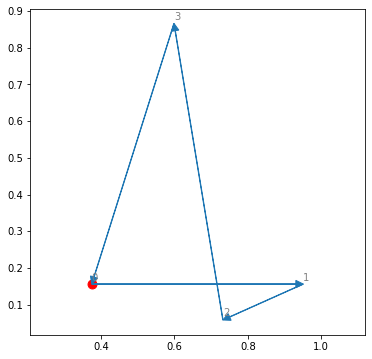

In [9]:
P = [0]  # starting from to "0"

for i in range(num - 2, -1, -1):
    d_min = np.inf
    p_min = None
    for m in memo:
        if len(m[1]) == i and  set(P) | {m[0]} | set(m[1]) == S:
            d = dist[P[-1]][m[0]] + memo[m]
            if d < d_min:
                d_min = d
                p_min = m[0]
    P.append(p_min)


print('Total Distance:', TSP_DP(0, S, 0))
print("\n")
print('Path:', P + [0])
print("\n")

plot_path(P + [0])

# Case 2 : Shortest Time

Total Time: 8


Path: [0, 3, 2, 1, 0]




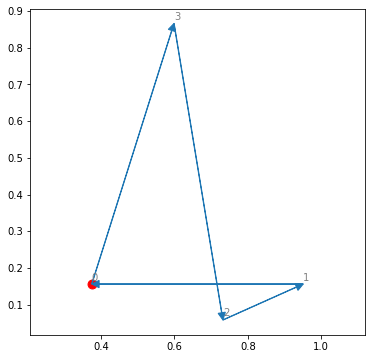

In [10]:
P = [0]  # starting from to "0"

for i in range(num - 2, -1, -1):
    d_min = np.inf
    p_min = None
    for m in memo1:
        if len(m[1]) == i and  set(P) | {m[0]} | set(m[1]) == S:
            d = time[P[-1]][m[0]] + memo1[m]
            if d < d_min:
                d_min = d
                p_min = m[0]
    P.append(p_min)

print('Total Time:', TSP_DP_TIME(0, S, 0))
print("\n")
print('Path:', P + [0])
print("\n")

plot_path(P + [0])

# Case 3 : Average Distance with Average Time

Average Path Value: 12


Path: [0, 1, 2, 3, 0]




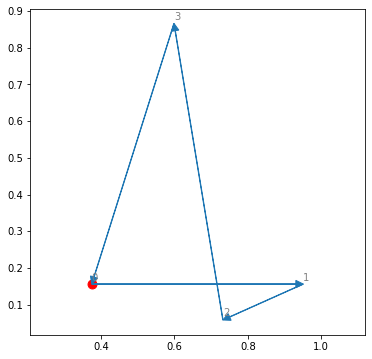

In [11]:
P = [0]  # starting from to "0"

for i in range(num - 2, -1, -1):
    d_min = np.inf
    p_min = None
    for m in memo2:
        if len(m[1]) == i and  set(P) | {m[0]} | set(m[1]) == S:
            d = avg_dist_time[P[-1]][m[0]] + memo2[m]
            if d < d_min:
                d_min = d
                p_min = m[0]
    P.append(p_min)
    # print(p_min)


print('Average Path Value:', TSP_DP_TIME_DIST(0, S, 0))
print("\n")
print('Path:', P + [0])
print("\n")

plot_path(P + [0])